In [69]:
import requests
import manipulating as man
import pandas as pd
import cleaning as clean
import re
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
#from pathlib import Path  
#env_path = Path('/src') / '.env'

In [70]:
#query='star%20wars'
api_key=os.getenv('NYT_APIKEY')
#reviews=get_url(api_key)

In [71]:
requestHeaders = {
    "Accept": "application/json" 
  }
url = f"https://api.nytimes.com/svc/movies/v2/reviews/search.json?offset={20}&order=by-title&api-key={api_key}"
response = requests.get(url, headers=requestHeaders)
data=response.json()
"""
if response.status_code != 200:
    raise ValueError(f'Invalid github api call: {data["message"]}')

else:
    print(f"Requested data to {baseUrl}; status_code:{response.status_code}")

"""


        

'\nif response.status_code != 200:\n    raise ValueError(f\'Invalid github api call: {data["message"]}\')\n\nelse:\n    print(f"Requested data to {baseUrl}; status_code:{response.status_code}")\n\n'

In [72]:
data

{'status': 'OK',
 'copyright': 'Copyright (c) 2020 The New York Times Company. All Rights Reserved.',
 'has_more': True,
 'num_results': 20,
 'results': [{'display_title': '#Female Pleasure',
   'mpaa_rating': '',
   'critics_pick': 0,
   'byline': 'JEANNETTE CATSOULIS',
   'headline': '‘#Female Pleasure’ Review: Fighting the Patriarchy',
   'summary_short': 'Barbara Miller’s humane profile of five women fighting back against sexism and misogyny is a hopeful, clearheaded confessional.',
   'publication_date': '2019-10-17',
   'opening_date': '2019-10-18',
   'date_updated': '2019-10-25 16:44:02',
   'link': {'type': 'article',
    'url': 'http://www.nytimes.com/2019/10/17/movies/female-pleasure-review.html',
    'suggested_link_text': 'Read the New York Times Review of #Female Pleasure'},
   'multimedia': {'type': 'mediumThreeByTwo210',
    'src': 'https://static01.nyt.com/images/2019/10/15/arts/female1/female1-mediumThreeByTwo210.jpg',
    'width': 210,
    'height': 140}},
  {'displa

In [73]:
movies=man.open_csv()

Please, enter the folder where your cvs file is saved:
src
Please, enter the name for the cvs file you want to open without extension:
movies


In [74]:
movies

,Title,Year,Age,IMDb,Netflix,Hulu,Prime_Video,Disney+,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,The Ghosts of Buxley Hall,1980,NaN,6.2,0,0,0,1,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,The Poof Point,2001,7+,4.7,0,0,0,1,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,Sharks of Lost Island,2013,NaN,5.7,0,0,0,1,Neil Gelinas,Documentary,United States,English,NaN
16742,Man Among Cheetahs,2017,NaN,6.6,0,0,0,1,Richard Slater-Jones,Documentary,United States,English,NaN


In [75]:
reviews=pd.DataFrame.from_dict(data['results'], orient='columns')

In [76]:
clean.rename_columns(reviews)

In [77]:
reviews.head()

,display_title,mpaa_rating,critics_pick,byline,headline,summary_short,publication_date,opening_date,date_updated,link,multimedia
0,#Female Pleasure,,0,JEANNETTE CATSOULIS,‘#Female Pleasure’ Review: Fighting the Patria...,Barbara Miller’s humane profile of five women ...,2019-10-17,2019-10-18,2019-10-25 16:44:02,"{'type': 'article', 'url': 'http://www.nytimes...","{'type': 'mediumThreeByTwo210', 'src': 'https:..."
1,#Horror,Not Rated,0,JEANNETTE CATSOULIS,Review: ‘#Horror’ Finds the Fear in Cyberbully...,In this feature directorial debut by Tara Subk...,2015-11-19,2015-11-20,2017-11-02 04:18:23,"{'type': 'article', 'url': 'http://www.nytimes...","{'type': 'mediumThreeByTwo210', 'src': 'https:..."
2,#Stuck,,0,NICOLAS RAPOLD,Road Rage as Aphrodisiac,&#8220;Stuck&#8221; centers on a couple who me...,2014-10-09,2014-10-10,2017-11-02 04:18:19,"{'type': 'article', 'url': 'http://www.nytimes...","{'type': 'mediumThreeByTwo210', 'src': 'https:..."
3,"$1,000 a Touchdown",,0,FRANK S. NUGENT,"$1,000 a Touchdown","An old rah-rah antique, but dig those three.",1939-10-05,1939-10-04,2017-11-02 04:17:01,"{'type': 'article', 'url': 'http://www.nytimes...",None
4,$9.99,R,0,A. O. SCOTT,Figures Made of Clay in an Imaginary World,“$9.99” uses an extraordinary technique to bri...,2009-06-18,None,2017-11-02 04:16:26,"{'type': 'article', 'url': 'http://www.nytimes...",None


In [78]:
reviews=clean.drop_columns(reviews,['critics_pick','mpaa_rating','summary_short','opening_date','date_updated','multimedia'])

In [79]:
reviews=reviews.rename(columns={"byline": "reviewer"})
reviews

,display_title,reviewer,headline,publication_date,link
0,#Female Pleasure,JEANNETTE CATSOULIS,‘#Female Pleasure’ Review: Fighting the Patria...,2019-10-17,"{'type': 'article', 'url': 'http://www.nytimes..."
1,#Horror,JEANNETTE CATSOULIS,Review: ‘#Horror’ Finds the Fear in Cyberbully...,2015-11-19,"{'type': 'article', 'url': 'http://www.nytimes..."
2,#Stuck,NICOLAS RAPOLD,Road Rage as Aphrodisiac,2014-10-09,"{'type': 'article', 'url': 'http://www.nytimes..."
3,"$1,000 a Touchdown",FRANK S. NUGENT,"$1,000 a Touchdown",1939-10-05,"{'type': 'article', 'url': 'http://www.nytimes..."
4,$9.99,A. O. SCOTT,Figures Made of Clay in an Imaginary World,2009-06-18,"{'type': 'article', 'url': 'http://www.nytimes..."
5,Spent,Elvis Mitchell,Spent (Movie),2000-08-25,"{'type': 'article', 'url': 'http://www.nytimes..."
6,38: Vienna Before the Fall,JANET MASLIN,38: VIENNA BEFORE THE FALL (MOVIE),1988-05-06,"{'type': 'article', 'url': 'http://www.nytimes..."
7,'71,MANOHLA DARGIS,"Review: In ‘ ’71,’ Young, Green and Behind Ene...",2015-02-26,"{'type': 'article', 'url': 'http://www.nytimes..."
8,C-Man,H. H. T.,C-Man,1949-05-28,"{'type': 'article', 'url': 'http://www.nytimes..."
9,Doc,HOWARD THOMPSON.,Doc (Movie),1971-08-19,"{'type': 'article', 'url': 'http://www.nytimes..."


In [80]:
clean.capital_names(reviews,'reviewer')

,display_title,reviewer,headline,publication_date,link
0,#Female Pleasure,Jeannette Catsoulis,‘#Female Pleasure’ Review: Fighting the Patria...,2019-10-17,"{'type': 'article', 'url': 'http://www.nytimes..."
1,#Horror,Jeannette Catsoulis,Review: ‘#Horror’ Finds the Fear in Cyberbully...,2015-11-19,"{'type': 'article', 'url': 'http://www.nytimes..."
2,#Stuck,Nicolas Rapold,Road Rage as Aphrodisiac,2014-10-09,"{'type': 'article', 'url': 'http://www.nytimes..."
3,"$1,000 a Touchdown",Frank S. Nugent,"$1,000 a Touchdown",1939-10-05,"{'type': 'article', 'url': 'http://www.nytimes..."
4,$9.99,A. O. Scott,Figures Made of Clay in an Imaginary World,2009-06-18,"{'type': 'article', 'url': 'http://www.nytimes..."
5,Spent,Elvis Mitchell,Spent (Movie),2000-08-25,"{'type': 'article', 'url': 'http://www.nytimes..."
6,38: Vienna Before the Fall,Janet Maslin,38: VIENNA BEFORE THE FALL (MOVIE),1988-05-06,"{'type': 'article', 'url': 'http://www.nytimes..."
7,'71,Manohla Dargis,"Review: In ‘ ’71,’ Young, Green and Behind Ene...",2015-02-26,"{'type': 'article', 'url': 'http://www.nytimes..."
8,C-Man,H. H. T.,C-Man,1949-05-28,"{'type': 'article', 'url': 'http://www.nytimes..."
9,Doc,Howard Thompson.,Doc (Movie),1971-08-19,"{'type': 'article', 'url': 'http://www.nytimes..."


In [81]:
reviews

,display_title,reviewer,headline,publication_date,link
0,#Female Pleasure,Jeannette Catsoulis,‘#Female Pleasure’ Review: Fighting the Patria...,2019-10-17,"{'type': 'article', 'url': 'http://www.nytimes..."
1,#Horror,Jeannette Catsoulis,Review: ‘#Horror’ Finds the Fear in Cyberbully...,2015-11-19,"{'type': 'article', 'url': 'http://www.nytimes..."
2,#Stuck,Nicolas Rapold,Road Rage as Aphrodisiac,2014-10-09,"{'type': 'article', 'url': 'http://www.nytimes..."
3,"$1,000 a Touchdown",Frank S. Nugent,"$1,000 a Touchdown",1939-10-05,"{'type': 'article', 'url': 'http://www.nytimes..."
4,$9.99,A. O. Scott,Figures Made of Clay in an Imaginary World,2009-06-18,"{'type': 'article', 'url': 'http://www.nytimes..."
5,Spent,Elvis Mitchell,Spent (Movie),2000-08-25,"{'type': 'article', 'url': 'http://www.nytimes..."
6,38: Vienna Before the Fall,Janet Maslin,38: VIENNA BEFORE THE FALL (MOVIE),1988-05-06,"{'type': 'article', 'url': 'http://www.nytimes..."
7,'71,Manohla Dargis,"Review: In ‘ ’71,’ Young, Green and Behind Ene...",2015-02-26,"{'type': 'article', 'url': 'http://www.nytimes..."
8,C-Man,H. H. T.,C-Man,1949-05-28,"{'type': 'article', 'url': 'http://www.nytimes..."
9,Doc,Howard Thompson.,Doc (Movie),1971-08-19,"{'type': 'article', 'url': 'http://www.nytimes..."


In [82]:
clean.special_characters(reviews,'headline','display_title')

,display_title,reviewer,headline,publication_date,link
0,Female Pleasure,Jeannette Catsoulis,‘Female Pleasure’ Review: Fighting the Patriarchy,2019-10-17,"{'type': 'article', 'url': 'http://www.nytimes..."
1,Horror,Jeannette Catsoulis,Review: ‘Horror’ Finds the Fear in Cyberbullyi...,2015-11-19,"{'type': 'article', 'url': 'http://www.nytimes..."
2,Stuck,Nicolas Rapold,Road Rage as Aphrodisiac,2014-10-09,"{'type': 'article', 'url': 'http://www.nytimes..."
3,"$1,000 a Touchdown",Frank S. Nugent,"$1,000 a Touchdown",1939-10-05,"{'type': 'article', 'url': 'http://www.nytimes..."
4,$9.99,A. O. Scott,Figures Made of Clay in an Imaginary World,2009-06-18,"{'type': 'article', 'url': 'http://www.nytimes..."
5,Spent,Elvis Mitchell,Spent (Movie),2000-08-25,"{'type': 'article', 'url': 'http://www.nytimes..."
6,38: Vienna Before the Fall,Janet Maslin,38: VIENNA BEFORE THE FALL (MOVIE),1988-05-06,"{'type': 'article', 'url': 'http://www.nytimes..."
7,'71,Manohla Dargis,"Review: In ‘ ’71,’ Young, Green and Behind Ene...",2015-02-26,"{'type': 'article', 'url': 'http://www.nytimes..."
8,C-Man,H. H. T.,C-Man,1949-05-28,"{'type': 'article', 'url': 'http://www.nytimes..."
9,Doc,Howard Thompson.,Doc (Movie),1971-08-19,"{'type': 'article', 'url': 'http://www.nytimes..."


In [83]:
reviews['link']=reviews['link'].map(lambda x: x['url'])

In [84]:
reviews

,display_title,reviewer,headline,publication_date,link
0,Female Pleasure,Jeannette Catsoulis,‘Female Pleasure’ Review: Fighting the Patriarchy,2019-10-17,http://www.nytimes.com/2019/10/17/movies/femal...
1,Horror,Jeannette Catsoulis,Review: ‘Horror’ Finds the Fear in Cyberbullyi...,2015-11-19,http://www.nytimes.com/2015/11/20/movies/revie...
2,Stuck,Nicolas Rapold,Road Rage as Aphrodisiac,2014-10-09,http://www.nytimes.com/2014/10/10/movies/stuck...
3,"$1,000 a Touchdown",Frank S. Nugent,"$1,000 a Touchdown",1939-10-05,http://www.nytimes.com/1939/10/05/archives/the...
4,$9.99,A. O. Scott,Figures Made of Clay in an Imaginary World,2009-06-18,http://www.nytimes.com/2009/06/19/movies/19nin...
5,Spent,Elvis Mitchell,Spent (Movie),2000-08-25,http://www.nytimes.com/2000/08/25/movies/film-...
6,38: Vienna Before the Fall,Janet Maslin,38: VIENNA BEFORE THE FALL (MOVIE),1988-05-06,http://www.nytimes.com/1988/05/06/movies/revie...
7,'71,Manohla Dargis,"Review: In ‘ ’71,’ Young, Green and Behind Ene...",2015-02-26,http://www.nytimes.com/2015/02/27/movies/revie...
8,C-Man,H. H. T.,C-Man,1949-05-28,http://www.nytimes.com/1949/05/28/archives/-yo...
9,Doc,Howard Thompson.,Doc (Movie),1971-08-19,http://www.nytimes.com/1971/08/19/archives/an-...


In [85]:
for movie in list(movies.Title):
    for review in list(reviews.display_title):
        res = re.findall(r"%s" % review,r"(.*)%s(.*)" % movie)
        if res:
            review=res[0]

In [86]:
reviews

,display_title,reviewer,headline,publication_date,link
0,Female Pleasure,Jeannette Catsoulis,‘Female Pleasure’ Review: Fighting the Patriarchy,2019-10-17,http://www.nytimes.com/2019/10/17/movies/femal...
1,Horror,Jeannette Catsoulis,Review: ‘Horror’ Finds the Fear in Cyberbullyi...,2015-11-19,http://www.nytimes.com/2015/11/20/movies/revie...
2,Stuck,Nicolas Rapold,Road Rage as Aphrodisiac,2014-10-09,http://www.nytimes.com/2014/10/10/movies/stuck...
3,"$1,000 a Touchdown",Frank S. Nugent,"$1,000 a Touchdown",1939-10-05,http://www.nytimes.com/1939/10/05/archives/the...
4,$9.99,A. O. Scott,Figures Made of Clay in an Imaginary World,2009-06-18,http://www.nytimes.com/2009/06/19/movies/19nin...
5,Spent,Elvis Mitchell,Spent (Movie),2000-08-25,http://www.nytimes.com/2000/08/25/movies/film-...
6,38: Vienna Before the Fall,Janet Maslin,38: VIENNA BEFORE THE FALL (MOVIE),1988-05-06,http://www.nytimes.com/1988/05/06/movies/revie...
7,'71,Manohla Dargis,"Review: In ‘ ’71,’ Young, Green and Behind Ene...",2015-02-26,http://www.nytimes.com/2015/02/27/movies/revie...
8,C-Man,H. H. T.,C-Man,1949-05-28,http://www.nytimes.com/1949/05/28/archives/-yo...
9,Doc,Howard Thompson.,Doc (Movie),1971-08-19,http://www.nytimes.com/1971/08/19/archives/an-...


In [96]:
merged=pd.merge(left=movies,right=reviews, how='left', left_on='Title', right_on='display_title')

In [ ]:
movies = pd.merge(left=netflix,right=tmdb, how='left', left_on='Title', right_on='title')

In [ ]:
    for movie in list(df.Title):
        for review in list(api.display_title):
            res = re.findall(r"%s" % review,r"(.*)%s(.*)" % movie)
            if res:
                review=res[0]

In [23]:
movies.head()

,Title,Year,Age,IMDb,Netflix,Hulu,Prime_Video,Disney+,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [59]:
(movies.groupby('Age').agg({'Netflix':'sum','Hulu':'sum','Prime_Video':'sum','Disney+':'sum'}))

,Netflix,Hulu,Prime_Video,Disney+
Age,,,,
13+,383,119,819,40
16+,89,17,226,1
18+,752,290,2612,3
7+,323,109,916,179
all,130,55,406,277


<Figure size 576x576 with 0 Axes>

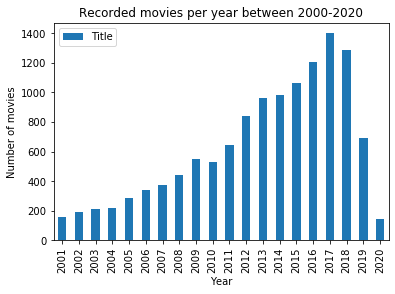

In [58]:
movies_years=movies[(movies['Year']<2021) & (movies['Year']>2000)].groupby('Year').agg({'Title':'count'})
plt.figure(figsize=(8,8))
movies_years.plot.bar(xlabel='Year',ylabel='Number of movies',title='Recorded movies per year between 2000-2020')

In [ ]:
    while data['has_more']==True:
        i+=1
        response = requests.get(url, headers=requestHeaders)
        print(f'Loading page {i}')
        data.update(response.json())
        print(data)

In [ ]:
movies.append(reviews)

In [ ]:
type(data.text)

In [ ]:
reviews['num_results']